In this assignment, the questions on plots will be graded manually, and the remaining questions will be auto-graded.

In [32]:
# Run this cell so that the necessary packages are imported. 

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
import scipy as sp
from scipy import stats as scs

## Q1

(a) Compute the mean of a random sample as follows:
    i.  Read data in from a specified comma-separated text file with header 
        and store it in data frame. 
    ii. Create a sample of the specified size by sampling without replacement.
        Unless otherwise specified, use the sample() function in pandas with 
        the specified random state value for repeatability. 
    iii.Select the column with specified index and return the mean of the values. 

In [33]:
# getMean(filename, columnIndex, sampleSize, random_state) takes as input the 
# filename to read in data from, the column index, sample size, and value of 
# random state to use in the sample() function in pandas. Returns the sample  
# mean of values in the column with the specified columnIndex.


def getMean(filename, columnIndex, sampleSize, random_state):
    
    ###
    ### YOUR CODE HERE
    ###
    df=pd.read_csv(filename)
    df1=df.sample(n=sampleSize,random_state=random_state,replace=False)
    return df1.iloc[:,columnIndex].mean()
    
# For example,
getMean('SAT_Participation_CT.csv', 5, 20, 10) # -> 9.3

9.3

In [34]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [35]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [36]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(b) Compute the average mean of a random sample as follows:
    i.  Repeat Q1a for each of the specified number of trials.
    ii. Set the 'random_state' parameter to trial number to faciliate testing, 
        i.e., for the first trial use random_state=0, for the second sample use 
        random_state=1, etc.
    iii.Return the average value of the mean (over the trials) and the standard 
        error. 


In [37]:
# getAverageMean(filename, columnIndex, sampleSize, num_trials) takes as input 
# the filename to read in data from, the column index, sample size, and the 
# number of trials. Returns a tuple with: the first element recording the average 
# sample mean in the column with the specified columnIndex, and the second  
# element recording the standard error (for the specified number of trials).
from statistics import mean
def getAverageMean(filename, columnIndex, sampleSize, num_trials):
    ###
    ### YOUR CODE HERE
    ###
    df=pd.read_csv(filename)
    Mean=0
    std=[]
    av=[]
    for i in range(num_trials):
        df1=df.sample(n=sampleSize,random_state=i,replace=False)
        Mean=df1.iloc[:,columnIndex].mean()
        av.append(Mean);
        std.append(df1.iloc[:,columnIndex].std())
    AV=pd.DataFrame(av)
    stder=AV.std()
    return sum(av)/num_trials,stder[0]/math.sqrt(10)
    
# For example,
getAverageMean('SAT_Participation_CT.csv', 5, 20, 10) #-> (7.3950000000000005, 1.7400582685007357)

(7.3950000000000005, 1.7400582685007355)

In [38]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [39]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [40]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Q2 (2 pts)

(a) Plot the sample mean as a function of sample size:
    i.  Consider the file 'SAT_Participation_CT.csv'. 
    ii. Using the function from Q1b, with number of trials = 10, calculate the 
        average mean and standard error for the values in the fifth column. Use 
        the following sample sizes: [10, 25, 50, 75, 100, 150, 185]. 
    iii.Create a line plot with the sample size on x axis and avg mean value on 
        the y axis. Add standard error bars to each point using the errorbar() 
        function in python.

(b) Repeat Q2a but use 50 trials. Note the difference in the error bars.

[6.660000000000001, 7.359999999999999, 7.2440000000000015, 7.151999999999999, 6.739999999999999, 6.68, 5.848108108108108]
[2.010594163149015, 1.803236596296288, 0.9141835458788106, 0.7864788225194655, 0.517199725014965, 0.200626180239596, 0.038293693312189514]


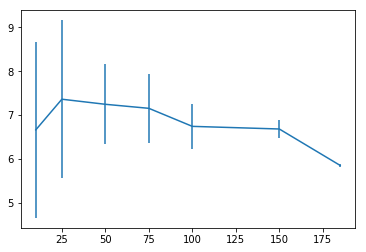

In [41]:
import matplotlib.pyplot as plt
sample_sizes = [10, 25, 50, 75, 100, 150, 185]
num_trials = 10
col_index = 5
avgMean=[]
stdError=[]
for i in range(len(sample_sizes)):
    Mean=((getAverageMean('SAT_Participation_CT.csv', 5, sample_sizes[i], num_trials))[0])
    std=((getAverageMean('SAT_Participation_CT.csv', 5, sample_sizes[i], num_trials))[1])
    avgMean.append(Mean)
    stdError.append(std)
print(avgMean)
print(stdError)
plt.errorbar(sample_sizes,avgMean,yerr=stdError)
plt.show()

###
### YOUR CODE HERE
###

## Q3

(a) Compute the standard deviation of a random sample as follows:
    i.  Read data in from a specified comma-separated text file with header 
        and store it in data frame. 
    ii. Create a sample of the specified size by sampling without replacement.
        Unless otherwise specified, use the sample() function in pandas with 
        the specified random state value for repeatability. 
    iii.Select the column with specified index and return the standard 
        deviation of the values. 
 

In [42]:
# getStddev(filename, columnIndex, sampleSize, random_state) takes as input 
# the filename to read in data from, the column index, sample size, and the 
# value of random state to use in the sample() function in pandas. Returns the
# standard deviation of the sampled values (sampled without replacement) in the 
# column with the specified columnIndex.

# For example,
# getStddev('SAT_Participation_CT.csv', 5, 10, 10) -> 50.82431614012245

def getStddev(filename, columnIndex, sampleSize, random_state):
    ###
    ### YOUR CODE HERE
    ###
    df=pd.read_csv(filename)
    df1=df.sample(n=sampleSize,random_state=random_state,replace=False)
    return df1.iloc[:,columnIndex].std()
getStddev('SAT_Participation_CT.csv', 5, 10, 10)

50.82431614012245

In [43]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [44]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [45]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(b) Compute the p-th percentile of the standard deviation over random samples as follows:
    i.  Repeat Q3a for each of the specified number of trials.
    ii. Set the 'random_state' parameter to trial number to faciliate testing, 
        i.e., for the first trial use random_state=0, for the second sample use 
        random_state=1, etc.
    iii.Return the p-th percentile (0 < p < 100) of the standard deviations (over the 
        trials). You can use the percentile() function in numpy.


In [46]:
# getPercentileStddev(filename, columnIndex, sampleSize, num_trials, p) takes 
# as input the filename to read in data from, the column index, sample size, 
# number of trials, and percentile p (0 < p < 100). Returns the p-th percentile
# of the standard deviations obtained over the different trials.
#

def getPercentileStddev(filename, columnIndex, sampleSize, num_trials, p):
    
    ###
    ### YOUR CODE HERE
    ###
    std=[]
    for i in range(num_trials):        
        std.append(getStddev(filename, columnIndex, sampleSize, i))
    return (np.percentile(std,p))
       
# For example,
print(getPercentileStddev('SAT_Participation_CT.csv', 5, 20, 10, 25))
# -> 18.10028776099324

print(getPercentileStddev('SAT_Participation_CT.csv', 5, 20, 10, 75))
# -> 37.91051782186642

18.10028776099324
37.91051782186642


In [47]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [48]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Q4 (2 pts)

(a) Plot the standard deviation percentile as a function of sample size:
    i.  Consider the file 'SAT_Participation_CT.csv'. 
    ii. Using the function from Q3b, with number of trials = 10, calculate the 
        25th percentile of the standard deviation for the values sampled from the 
        fifth column. Use sample sizes: [10, 25, 50, 75, 100, 150, 185]. 
    iii.Create a line plot with the sample size on x axis and 25th percentile of the
        standard deviation on the y axis. 


[12.374860484311942, 20.94189787217818, 23.197614828368806, 23.866998530529806, 25.774394829204283, 26.3503802457858, 25.434258052559066]


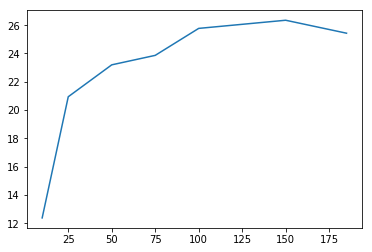

In [49]:
sample_sizes = [10, 25, 50, 75, 100, 150, 185]
num_trials = 10
col_index = 5
p = 25
perstd=[]
for i in sample_sizes:
    perstd.append(getPercentileStddev('SAT_Participation_CT.csv', 5, i, num_trials, p))
print(perstd)
plt.plot(sample_sizes,perstd)
plt.show()
###
### YOUR CODE HERE
###


(b) Repeat Q4a but use 50 trials. Note the difference.

[16.779223556187695, 17.993546810102018, 21.63584563531508, 23.167859909157823, 24.56692528871836, 25.27836106851944, 25.43591425783764]


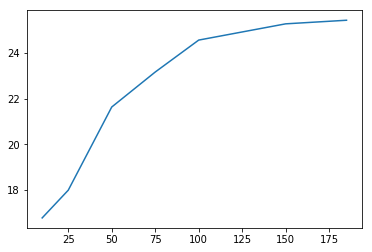

In [50]:
###
### YOUR CODE HERE
###
sample_sizes = [10, 25, 50, 75, 100, 150, 185]
num_trials = 50
col_index = 5
p = 25
perstd=[]
for i in sample_sizes:
    perstd.append(getPercentileStddev('SAT_Participation_CT.csv', 5, i, num_trials, p))
print(perstd)
plt.plot(sample_sizes,perstd)
plt.show()

(c) Repeat Q4a (using 10 trials) but estimate the 75th percentile of standard deviation.

[31.499533889226182, 38.03800035297361, 31.413110944025888, 30.339451338737586, 29.069376945065684, 27.096653062269475, 25.499616317285557]


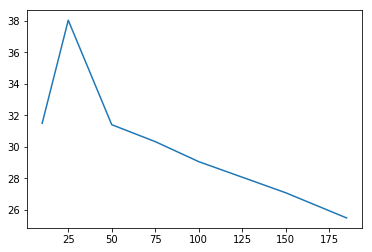

In [51]:
###
### YOUR CODE HERE
###
sample_sizes = [10, 25, 50, 75, 100, 150, 185]
num_trials = 10
col_index = 5
p = 75
perstd=[]
for i in sample_sizes:
    perstd.append(getPercentileStddev('SAT_Participation_CT.csv', 5, i, num_trials, p))
print(perstd)
plt.plot(sample_sizes,perstd)
plt.show()

(d) Repeat Q4c but use 100 trials. Note the difference.

[42.085098972861594, 41.284864054517605, 33.52701621568091, 33.154158083085115, 30.087876346301062, 27.188398137598885, 25.503217464813716]


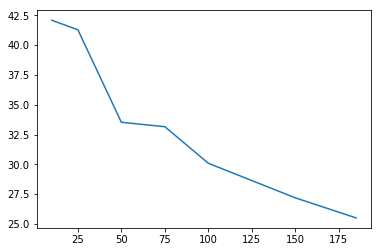

In [52]:
###
### YOUR CODE HERE
###
sample_sizes = [10, 25, 50, 75, 100, 150, 185]
num_trials = 10
col_index = 5
p = 100
perstd=[]
for i in sample_sizes:
    perstd.append(getPercentileStddev('SAT_Participation_CT.csv', 5, i, num_trials, p))
print(perstd)
plt.plot(sample_sizes,perstd)
plt.show()

## Q5: Transform attribute values

i. Read data in from a specified comma-separated text file with header, store in data frame. 
ii. Transform the values of the column with specified column index, by subtracting the column mean and dividing by the column standard deviation. 
iii. Return the transformed values as a Pandas Series.

In [53]:
# standardize(filename, columnIndex) takes as input the filename to read in data 
# from, and the column index specifying which values to transform. Returns the 
# standardized column values as a Pandas Series object (column from DataFrame).
#

def standardize(filename, columnIndex):
    
    ###
    ### YOUR CODE HERE
    ###
    df=pd.read_csv(filename).iloc[:,columnIndex]
    mean=df.mean()
    df=(df-mean)/df.std()
    return df

# For example,
standardize('SAT_Participation_CT.csv', 5) # -> standardized_col
# 0     -0.703558
# 1     -0.388243
# 2     -0.151756
# ...
# 185   -0.624729
# 186    0.005902


0     -0.703558
1     -0.388243
2     -0.151756
3     -0.427657
4      0.242388
5      4.262661
6      0.281803
7      0.124145
8      0.400046
9     -0.703558
10    -1.294775
11    -0.427657
12    -0.624729
13    -0.388243
14    -0.585315
15    -0.664144
16     0.597118
17    -0.348828
18     0.202974
19    -0.269999
20    -0.033513
21    -0.072927
22    -1.097703
23     0.281803
24    -0.545900
25    -0.821802
26    -0.309414
27    -0.348828
28     0.084731
29     0.281803
         ...   
157    0.400046
158    0.321217
159    3.001399
160    2.489011
161    1.070091
162   -0.112342
163    0.045316
164   -1.176531
165    0.124145
166    0.124145
167   -0.585315
168   -0.151756
169   -1.058288
170   -0.072927
171   -2.556037
172   -0.388243
173   -0.545900
174   -0.900630
175    2.055452
176    2.252525
177    0.754776
178    0.675947
179    0.321217
180   -0.427657
181   -1.215946
182   -0.348828
183   -0.348828
184   -0.664144
185   -0.624729
186    0.005902
Name: Test-takers: Chang

In [54]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Q6 (2 pts)

(a) Create a density plot for values in a specified column:
    i.  Consider the file 'SAT_Participation_CT.csv'. 
    ii. Plot the density of (all) the values in the fifth column. 

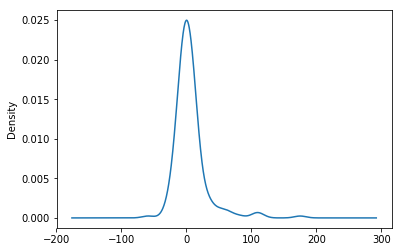

In [55]:
###
### YOUR CODE HERE
###
df=pd.read_csv( 'SAT_Participation_CT.csv').iloc[:,5]
df.plot(kind="density")
plt.show()

(b) Repeat Q5a but standardize the values in the fifth column before plotting the density. Note the difference in location and/or scale. 

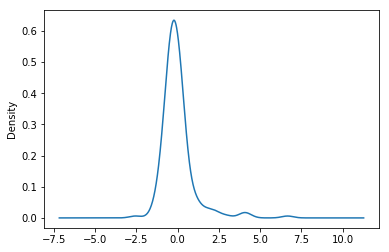

In [56]:
###
### YOUR CODE HERE
###
df=pd.read_csv('SAT_Participation_CT.csv').iloc[:,5]
mean=df.mean()
df=(df-mean)/df.std()
df.plot(kind="density")
plt.show()    

## Q7: Confidence intervals

i. Consider the file 'bush-gore-results-fl.csv'. 
ii. Randomly sample 30 counties (i.e., rows) without replacement using the specified sample size, and set random_state = 10.
iii. For each of the specified candidates (i.e., column names), calculate the mean number of votes obtained by the candidate.
iv. For each of the candidates, calcuate a confidence interval, with the specified percentage, for the estimated mean. 
v. Return a list of CIs in order for the specified candidates.


In [57]:
# getCIs(filename, candidates, sampleSize, ciPercent) takes as input the filename 
# to read in data from, a list of candidates, sample size, and CI percentage. 
# Returns a list of calculated CIs in the order of the specified candidates.
#
randomState = 10
def getCIs(filename, candidates, sampleSize, ciPercent):
    ###
    ### YOUR CODE HERE
    ###
    df=pd.read_csv(filename).sample(n=sampleSize,random_state=randomState,replace=False)
    Mean=[]
    ci=[]
    for i in candidates:
        mean=df.loc[:,i].mean()
        Mean.append(mean)
        stdErrEst = df.loc[:,i].std() / np.sqrt(sampleSize)
        ci.append(sp.stats.norm.interval(ciPercent, loc = mean, scale = stdErrEst))
    return ci
# For example,
getCIs('bush-gore-results-fl.csv', ['brow', 'harr', 'hage'], 30, 0.95)
# -> 
# [(103.68845461817915, 330.51154538182084),
# (2.501899878450637, 9.96476678821603),
# (4.860537116980019, 67.20612954968664)]


[(103.68845461817914, 330.51154538182084),
 (2.5018998784506374, 9.964766788216028),
 (4.860537116980019, 67.20612954968664)]

In [58]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [59]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Q8 (2 pts)

(a) Create a bar plot for the vote means of the specified candidates and show the CIs using errorbars:
    i.  Consider the file 'bush-gore-results-fl.csv'.
    ii. Consider the candidates: ['brow', 'harr', 'hage', 'buch', 'mcre', 'phil', 'moor']. 
    iii.Sample 30 counties and calculate vote means and 95% confidence intervals. 
    iv. Plot the results as a bar plot with error bars to show the CIs. 

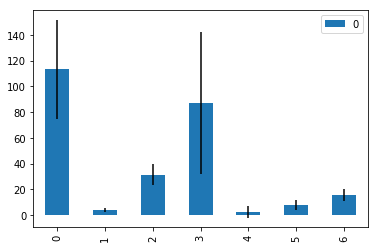

In [60]:
filename = 'bush-gore-results-fl.csv'
candidates = ['brow', 'harr', 'hage', 'buch', 'mcre', 'phil', 'moor']
sampleSize = 30
ciPercent = 0.95
randomState = 10
###
### YOUR CODE HERE
###
stdEr=[]
for i in candidates:
    stdEr.append(((pd.read_csv(filename).loc[:,i]).sem()))
max=[x[1] for x in (getCIs(filename, candidates, sampleSize, ciPercent))]
min=[x[0] for x in (getCIs(filename, candidates, sampleSize, ciPercent))]
x=(np.array(max)-np.array(min))/2

x=pd.DataFrame(x)
x.plot.bar(yerr=stdEr)
plt.show()

(b) Repeat Q8a for the following candidates: ['bush', 'gore', 'nade']

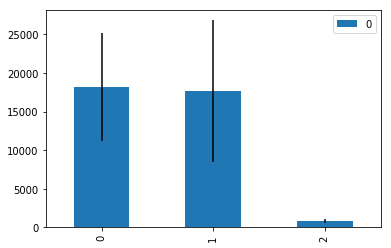

In [61]:
candidates = ['bush', 'gore', 'nade']

filename = 'bush-gore-results-fl.csv'
sampleSize = 30
ciPercent = 0.95
randomState = 10
###
### YOUR CODE HERE
###
stdEr=[]
for i in candidates:
    stdEr.append(((pd.read_csv(filename).loc[:,i]).sem()))
max=[x[1] for x in (getCIs(filename, candidates, sampleSize, ciPercent))]
min=[x[0] for x in (getCIs(filename, candidates, sampleSize, ciPercent))]
x=(np.array(max)-np.array(min))/2
x=pd.DataFrame(x)
x.plot.bar(yerr=stdEr)
plt.show()